In [2]:
#Setup
import numpy as np
import rebound
from rebound import hash as h
from matplotlib import pyplot as plt
import os
from celluloid import Camera # getting the camera
from IPython.display import HTML # to show the animation in Jupyter

# print(os.listdir("."))

sa = rebound.Simulationarchive("archiveB.bin")
N_tp=20
N_pl = 8 #Number of planets + 1 (for the sun)


/home/proctort/.local/lib/python3.9/site-packages/rebound/simulationarchive.py:103: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed. Binary file was saved with REBOUND Version 3.25.1. You are currently using REBOUND Version 4.4.2.
  warnings.warn(message, RuntimeWarning)


/home/proctort/.local/lib/python3.9/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/proctort/.local/lib/python3.9/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: Encountered unknown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


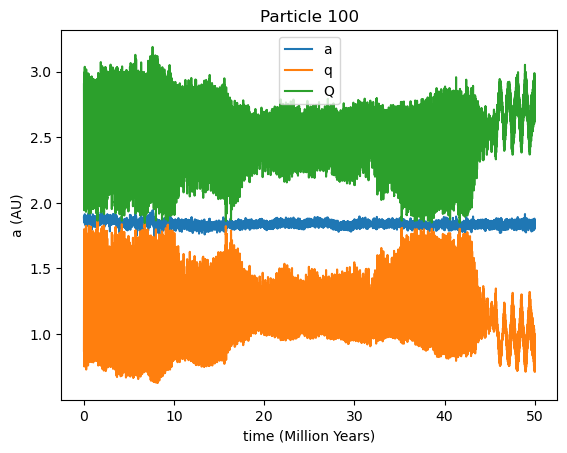

In [12]:
#Orbit Data

# sa = rebound.Simulationarchive("archive.bin")
t = np.zeros(len(sa))
a = np.zeros(len(sa))
e = np.zeros(len(sa))

pid = 100

for i, sim in enumerate(sa):
    t[i] = sim.t/1e6
    try:
        a[i] = sim.particles[h(pid)].a
        e[i] = sim.particles[h(pid)].e
    except rebound.ParticleNotFound:
        a = a[:i]
        e = e[:i]
        t = t[:i]
        break

q = a*(1-e)
Q = a*(1+e)

plt.plot(t,a,label="a")
plt.plot(t,q,label="q")
plt.plot(t,Q,label="Q")
# plt.yscale("log")
plt.xlabel("time (Million Years)")
plt.ylabel("a (AU)")
plt.title("Particle {0}".format(pid))
plt.legend()

Done!


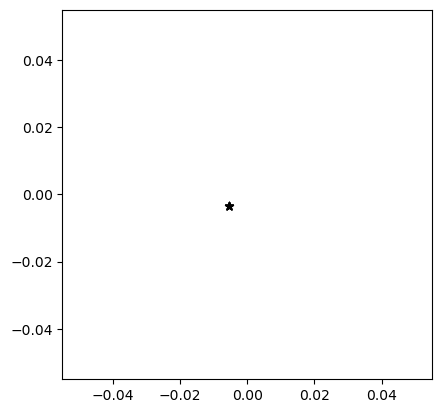

In [14]:
#Orbit Movie

switch = 0
#Failsafe so I don't get a ton of images
if switch ==1:
    pid = 110
    count = 0 # This will number your frames consecutively
    fig, ax = plt.subplots() # Define your figure and axis
    for i, sim in enumerate(sa): # Go through ever
        if i%30: # Only plot every _th frame
            continue
        try:
            sim.move_to_com()
            op1 = rebound.OrbitPlot(sim, fig = fig, ax = ax, 
                                    orbit_style="solid", lw=1,particles=[1,2,3,4,5,6])
            # Important! Note the use of the fig and ax keywords. You must use both
            # to avoid making a new figure.
            op1.particles.set_sizes([0])
            op2 = rebound.OrbitPlot(sim, fig = fig, ax = ax, 
                                    orbit_style="solid", lw=1, particles=[h(pid)], color="red")

            op2.particles.set_sizes([0])
            # Note: Because the original figure/axis with a standard matplotlib command
                # instead of an OrbitPlot command, you must do a few things by hand
                # that are otherwise done automatically by OrbitPlot

            ax.set_aspect("equal") # Make sure a circular orbit actually is looks circular
            ax.set_xlim(-8,8) # Set your limits
            ax.set_ylim(-8,8)
            ax.set_xlabel("x [AU]") # Label your axis
            ax.set_ylabel("y [AU]")
            # Add a title, and write the current time
            ax.set_title("Particle {0}".format(pid))
            ax.text(-4,-7,"t = {:4.1f} Myr".format(sim.t/1e6))
            # Save your figure
            fig.savefig("frame_{:04d}.png".format(count))
            # Incriment your frame counter
            count += 1
            # Clear your axis, so you can reuse it in the next frame
            ax.clear()
        except rebound.ParticleNotFound:
            break
    print("Done!")

NameError: name 'im' is not defined

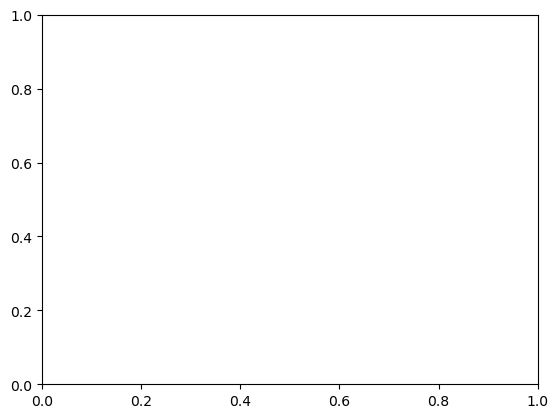

In [3]:

fig, ax = plt.subplots() # creating my fig
cbar = fig.colorbar(im,ax=ax)
cax = cbar.ax
count = 0

# camera = Camera(fig)# the camera gets the fig we’ll plot
for i, sim in enumerate(sa):
    if i%100: # Thin the output
        continue
    print("loop", count)
    #Old:
    a_all = []
    e_all = []
    for i, sim in enumerate(sa):
        for pid in range(100,100+N_tp):
            try:
                a_all.append(sim.particles[h(pid)].a)
                e_all.append(sim.particles[h(pid)].e)
            except rebound.ParticleNotFound:
                continue # Continue on with the next clone
    
    amin, amax = 0, 12
    emin, emax = 0, 1
    h2d,xedge,yedge,im = plt.hist2d(a_all, e_all, range=[[amin,amax],[emin,emax]],
        bins=(30, 30), ax=ax)
    plt.xlabel("a (AU)")
    plt.ylabel("e")
    plt.colorbar()

    a_init=1.6162
    e_init=0.6526
    ax.plot(a_init,e_init,"*",color="r")
    
    
    fig.savefig('frame_{:04d}.png'.format(count))
    ax.clear()
    count+=1
    
#     camera.snap() # the camera takes a snapshot of the plot
# animation = camera.animate() # animation ready
# HTML(animation.to_html5_video()) # displaying the animation in your notebook

print("Done!")
# animation.save("my_animation.gif")